In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
df = pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
selected_columns = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT',
                    'AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                    'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                    'FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
df_selected = df[selected_columns]

In [6]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

# Data Pre-processing and Feature Engineering

In [7]:
df_selected.isna().sum()

,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12
AMT_GOODS_PRICE,278


In [8]:
df_selected['OCCUPATION_TYPE'].value_counts()

,count
OCCUPATION_TYPE,
Laborers,55186
Sales staff,32102
Core staff,27570
Managers,21371
Drivers,18603
High skill tech staff,11380
Accountants,9813
Medicine staff,8537
Security staff,6721


In [9]:
df_selected['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

<ipython-input-9-d91d4c7b9005>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)
<ipython-input-9-d91d4c7b9005>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


In [10]:
df_selected.dropna(inplace=True)

<ipython-input-10-04de45e44632>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


In [11]:
# count customer age by days birth
df_selected['AGE'] = np.floor(df_selected['DAYS_BIRTH'] /-365).astype(int)
df_selected[['DAYS_BIRTH','AGE']].head()

<ipython-input-11-28ec7bbea89d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['AGE'] = np.floor(df_selected['DAYS_BIRTH'] /-365).astype(int)


,DAYS_BIRTH,AGE
0,-9461,25
1,-16765,45
2,-19046,52
3,-19005,52
4,-19932,54


In [12]:
# count customer work duration by days employed
df_selected['WORK_DURATION'] = np.floor(-df_selected['DAYS_EMPLOYED'] / 365).astype(int)
df_selected[['DAYS_EMPLOYED','WORK_DURATION']].head()

<ipython-input-12-d55eb2626460>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['WORK_DURATION'] = np.floor(-df_selected['DAYS_EMPLOYED'] / 365).astype(int)


,DAYS_EMPLOYED,WORK_DURATION
0,-637,1
1,-1188,3
2,-225,0
3,-3039,8
4,-3038,8


In [13]:
df_selected.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)

<ipython-input-13-a4683af5d560>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)


In [14]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307221 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307221 non-null  int64  
 1   NAME_CONTRACT_TYPE           307221 non-null  object 
 2   CODE_GENDER                  307221 non-null  object 
 3   FLAG_OWN_CAR                 307221 non-null  object 
 4   FLAG_OWN_REALTY              307221 non-null  object 
 5   CNT_CHILDREN                 307221 non-null  int64  
 6   AMT_INCOME_TOTAL             307221 non-null  float64
 7   AMT_CREDIT                   307221 non-null  float64
 8   AMT_ANNUITY                  307221 non-null  float64
 9   AMT_GOODS_PRICE              307221 non-null  float64
 10  NAME_INCOME_TYPE             307221 non-null  object 
 11  NAME_EDUCATION_TYPE          307221 non-null  object 
 12  NAME_FAMILY_STATUS           307221 non-null  object 
 13  NAME

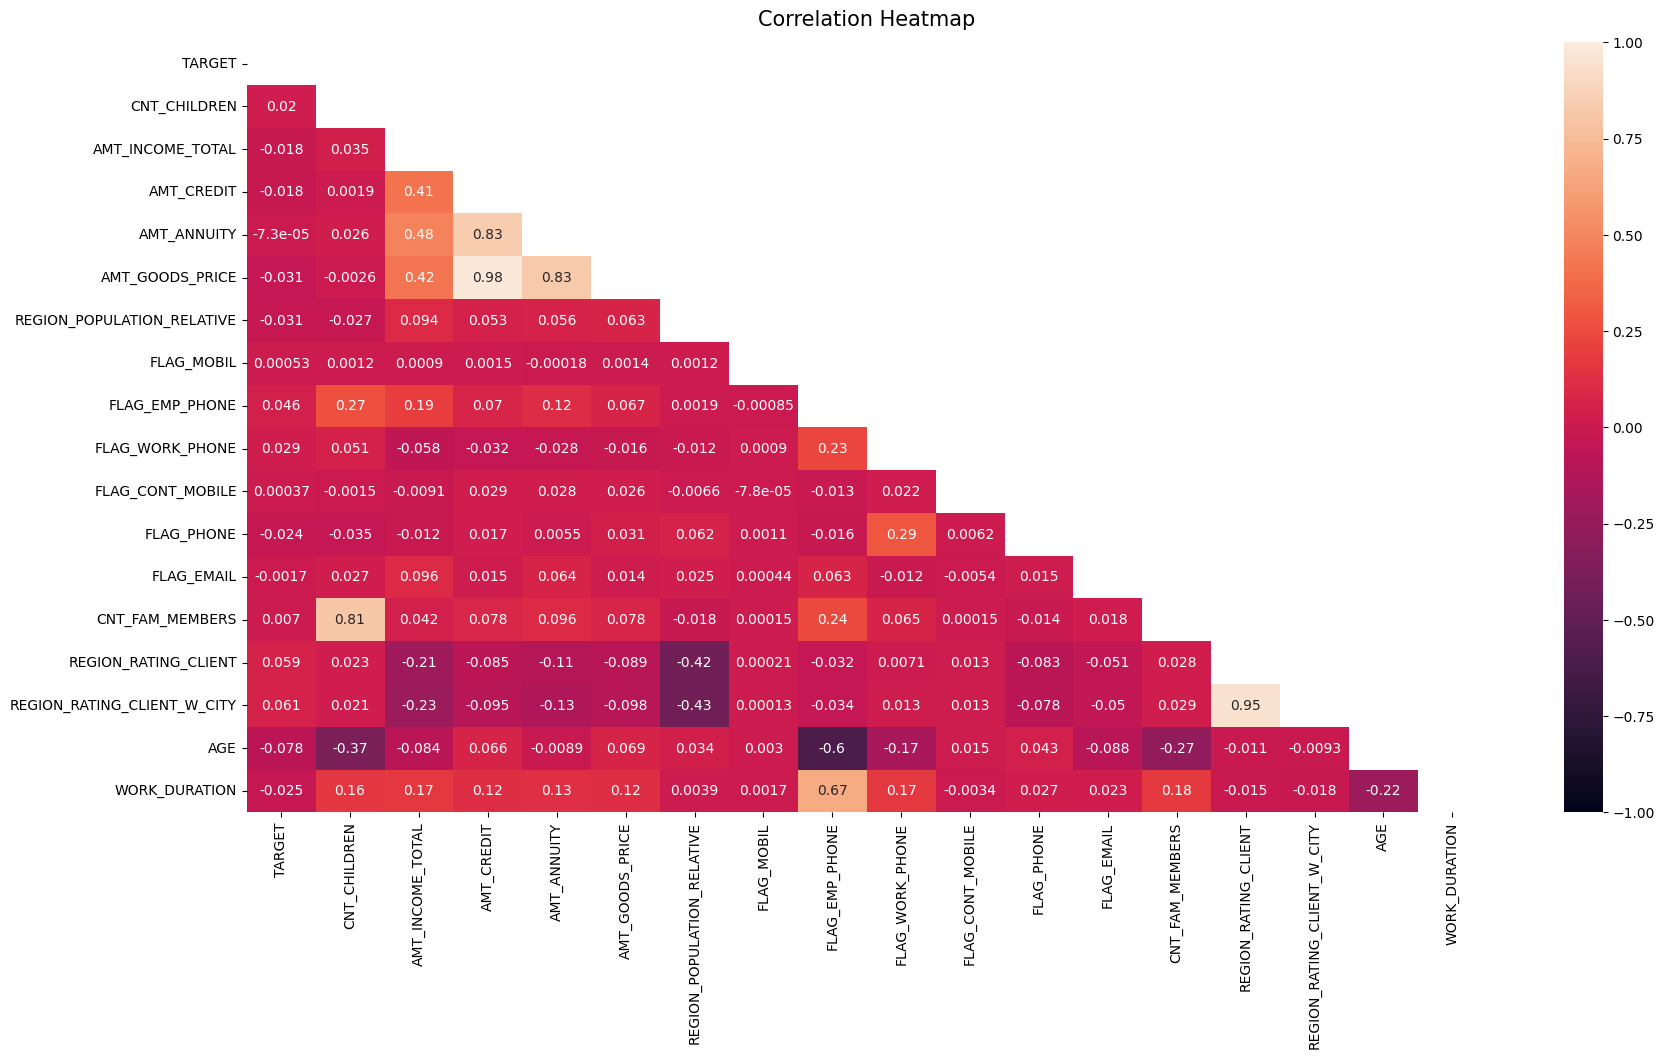

In [15]:
numeric_df = df_selected.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='spearman')
def corr_plot(df2, metode):
    plt.figure(figsize=(20, 10))
    triangle = np.triu(np.ones_like(df2.corr(method=metode)))
    heatmap = sns.heatmap(df2.corr(method=metode), vmin=-1, vmax=1, annot=True, mask=triangle)
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 15}, pad=12)
    plt.show()

corr_plot(numeric_df, "spearman")

In [16]:
# change data type
change_type = ['TARGET','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
                'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
df_selected[change_type] = df_selected[change_type].astype('object')
print(df_selected[change_type].dtypes)

TARGET                         object
FLAG_MOBIL                     object
FLAG_EMP_PHONE                 object
FLAG_WORK_PHONE                object
FLAG_CONT_MOBILE               object
FLAG_PHONE                     object
FLAG_EMAIL                     object
REGION_RATING_CLIENT           object
REGION_RATING_CLIENT_W_CITY    object
dtype: object


<ipython-input-16-b030a1208a8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[change_type] = df_selected[change_type].astype('object')


In [17]:
# Check Categorical feature
categorical = df_selected.select_dtypes(include='object').nunique()

In [18]:
# check numerical type
numeric = df_selected.select_dtypes(include=['int64', 'float64']).columns.tolist()

Checking Outliers

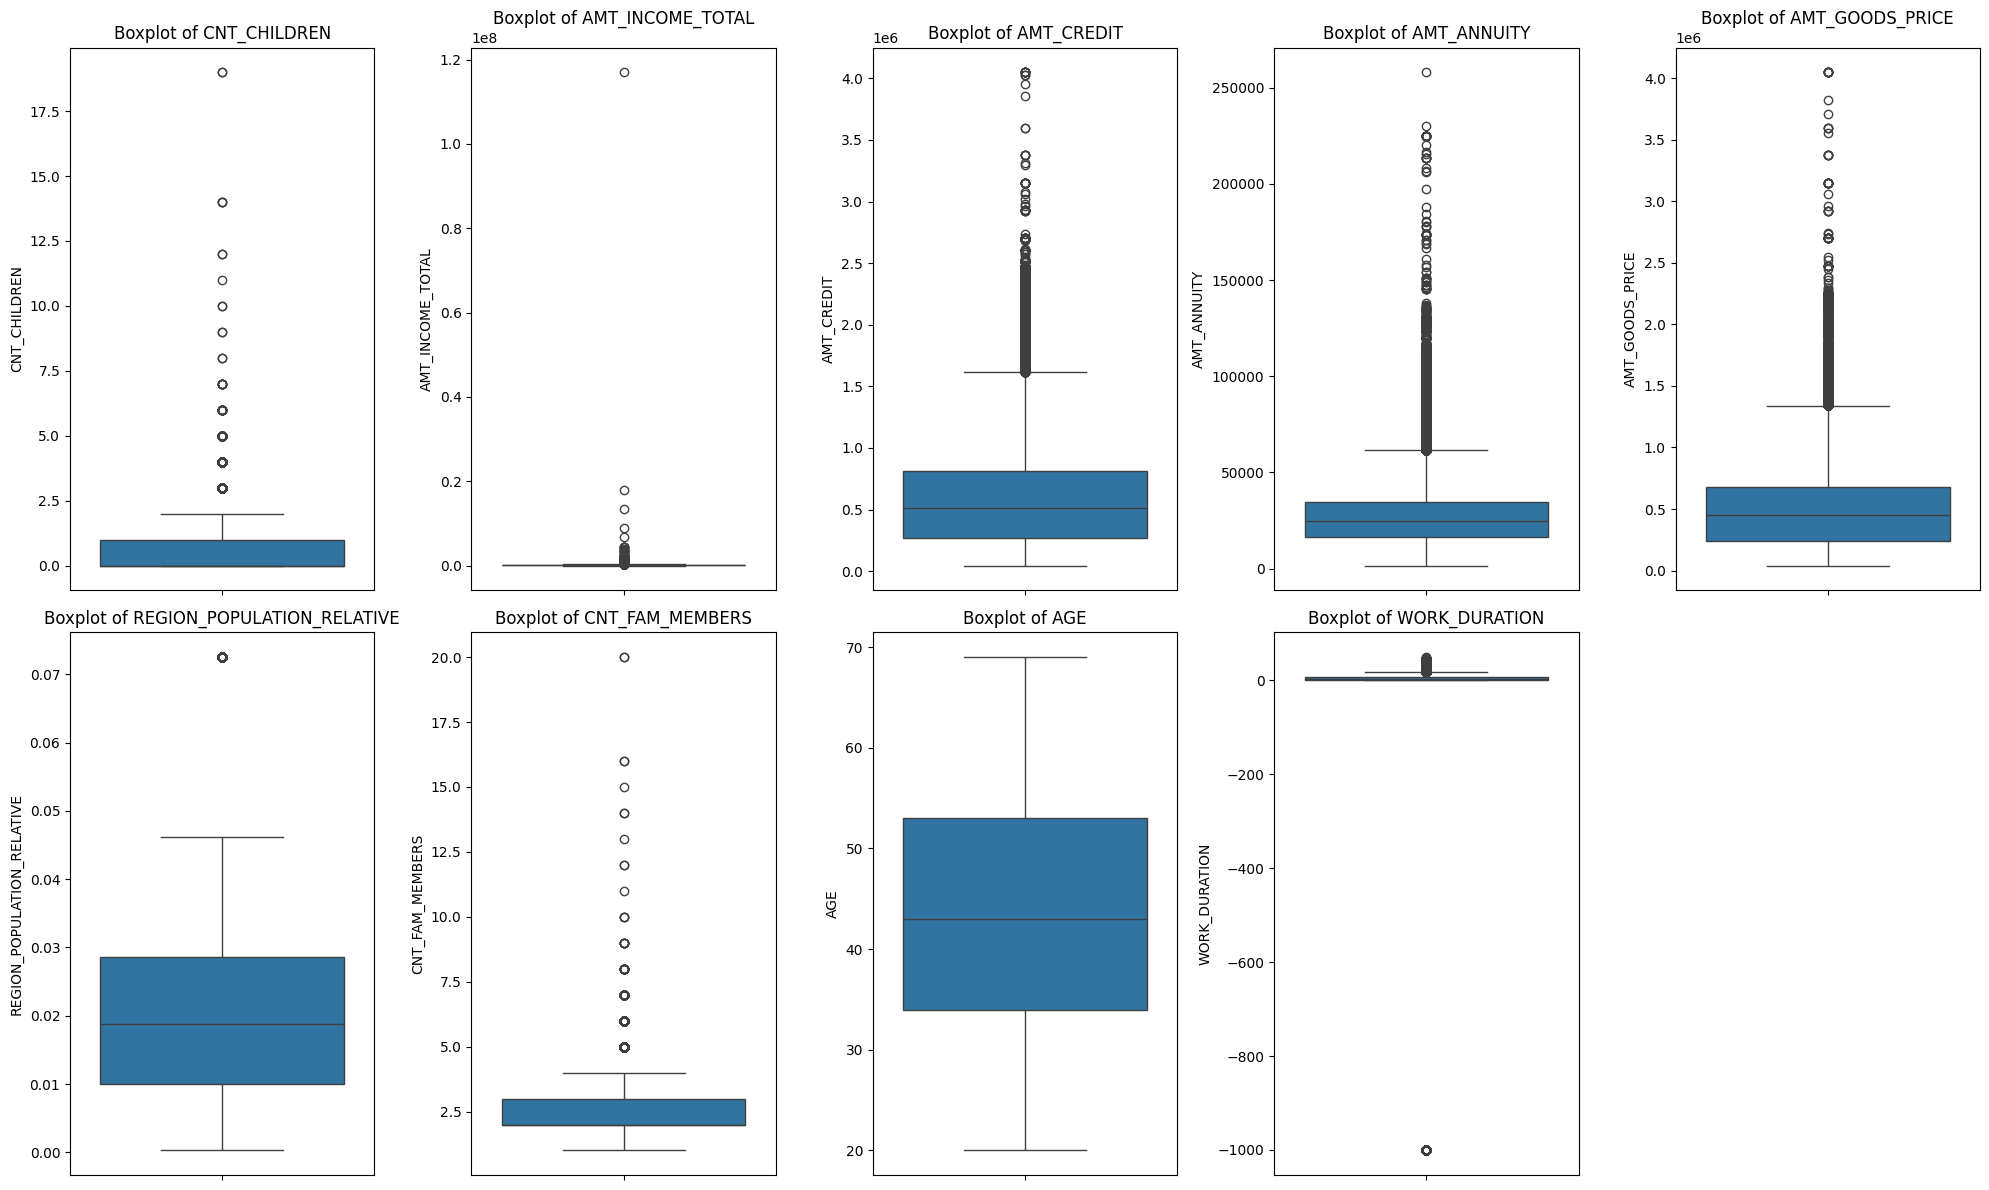

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

if numeric:
    rows = (len(numeric) // 5) + 1
    cols = min(5, len(numeric))

    fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
    axes = axes.flatten()

    for i, col in enumerate(numeric):
        sns.boxplot(data=df_selected, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')

    for i in range(len(numeric), len(axes)):
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom numerik untuk ditampilkan.")

# Data Visualization and Business Insight

<Axes: xlabel='CODE_GENDER', ylabel='count'>

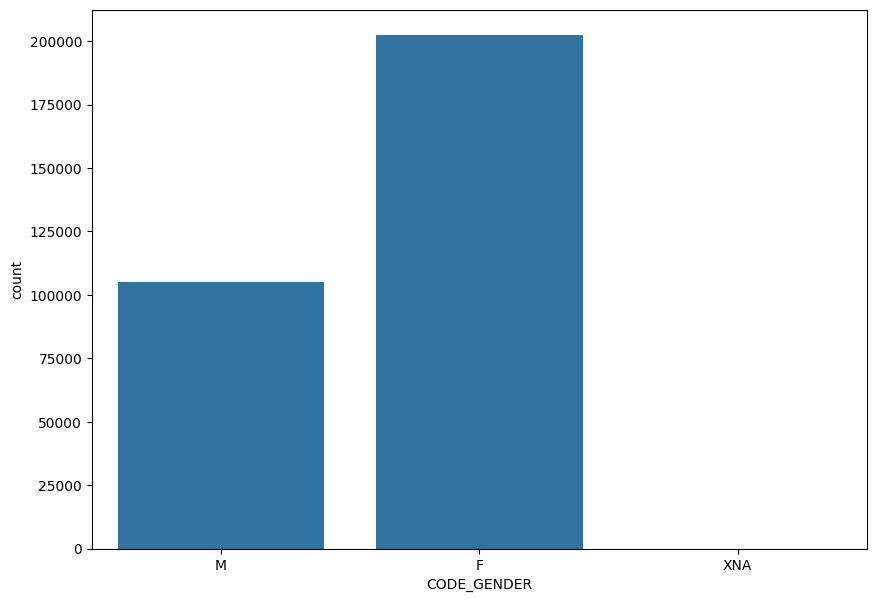

In [20]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER',data=df_selected)

In [21]:
df_selected['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202251
M,104966
XNA,4


From the data, females are the highest borrowers

<ipython-input-22-b9bf1471c5ea>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_selected['AGE'], bins=5, kde=False)


Text(0.5, 0, 'Customer Age Distribution')

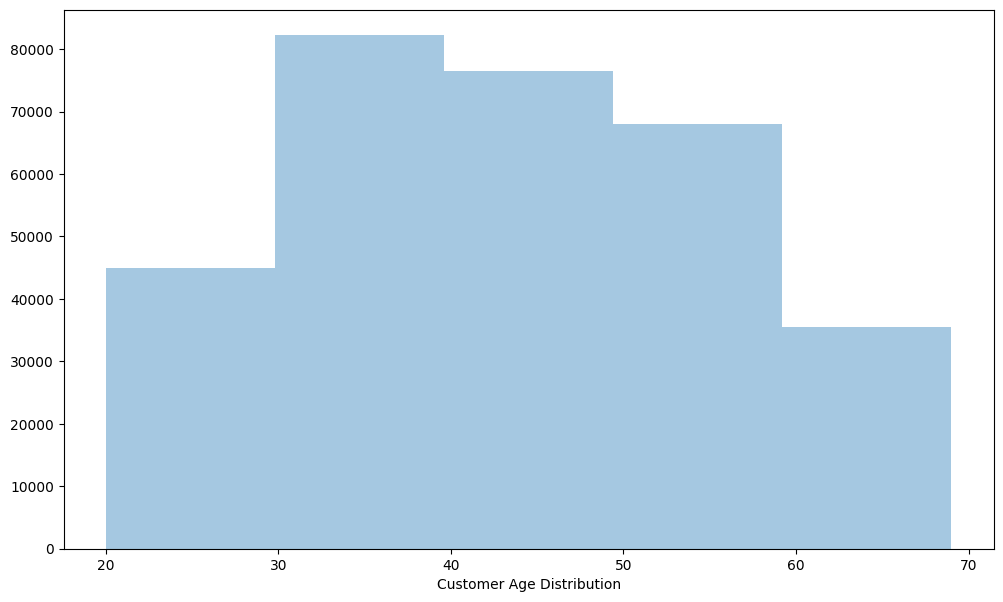

In [22]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(df_selected['AGE'], bins=5, kde=False)
plt.xlabel('Customer Age Distribution')

From the distribution plot, we know that range 40-50 years are the most applicants.

In [23]:
# checking the work duration
df_selected['WORK_DURATION'].describe()

,WORK_DURATION
count,307221.000000
mean,-175.400513
std,387.077874
min,-1001.000000
25%,0.000000
50%,3.000000
75%,7.000000
max,49.000000


there is work duration with minus that we need to delete

In [24]:
# delete minus value in work duration
df_selected = df_selected[df_selected['WORK_DURATION'] >= 0]

<ipython-input-25-c0862c55a912>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_selected['WORK_DURATION'], bins=5, kde=False)


Text(0.5, 0, 'Customer Work Duration Distribution')

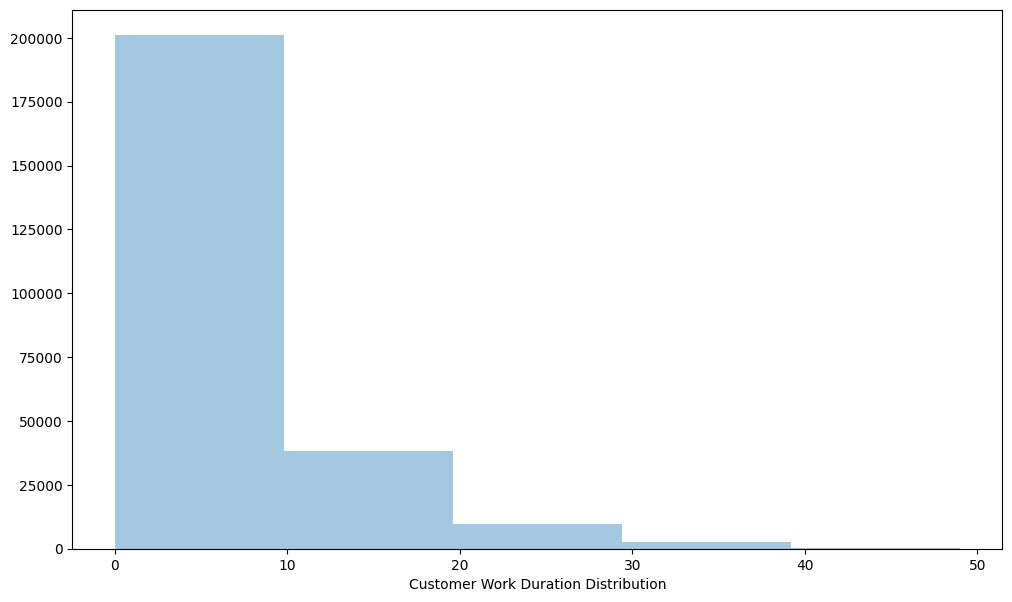

In [25]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(df_selected['WORK_DURATION'], bins=5, kde=False)
plt.xlabel('Customer Work Duration Distribution')

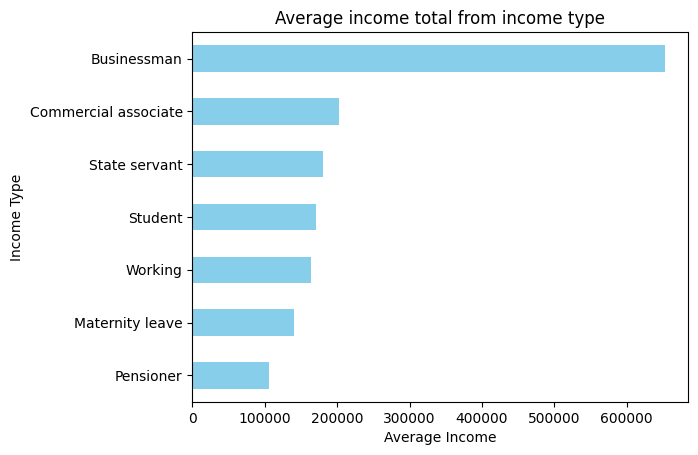

In [26]:
# Average Income from Income Type
df_selected.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values().plot.barh(
    title='Average income total from income type',
    color='skyblue')
plt.xlabel('Average Income')
plt.ylabel('Income Type')
plt.show()

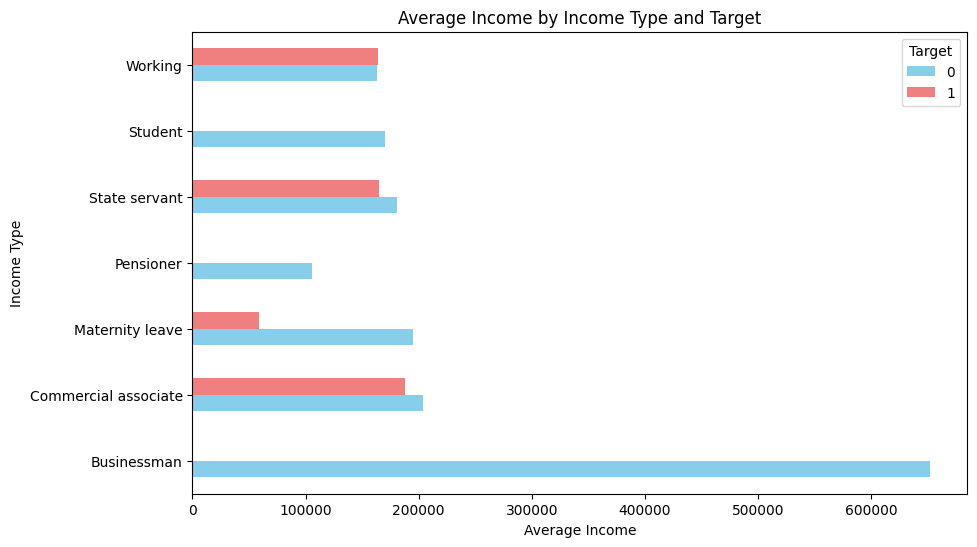

In [27]:
income_target_group = df_selected.groupby(['NAME_INCOME_TYPE', 'TARGET'])['AMT_INCOME_TOTAL'].mean().unstack()

# Plot the result
income_target_group.plot(kind='barh', figsize=(10,6), color=['skyblue', 'lightcoral'])
plt.title('Average Income by Income Type and Target')
plt.xlabel('Average Income')
plt.ylabel('Income Type')
plt.legend(title='Target', labels=['0', '1'])
plt.show()

<Axes: xlabel='TARGET', ylabel='count'>

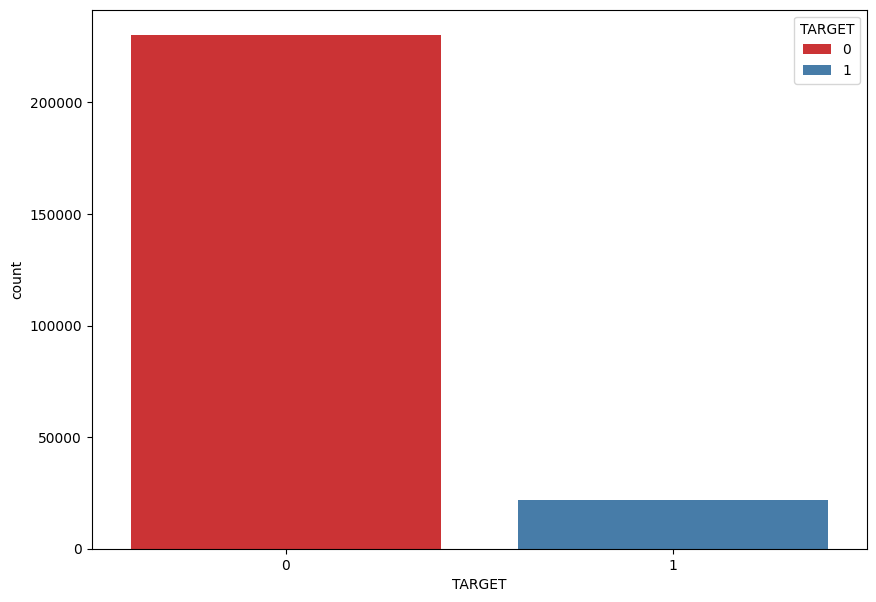

In [28]:
# target distribution
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x ='TARGET',data=df_selected, hue='TARGET',palette="Set1")

Client with payment difficulties (label 1) more less than other cases (label 0). This is an imbalance class

<Axes: xlabel='TARGET', ylabel='count'>

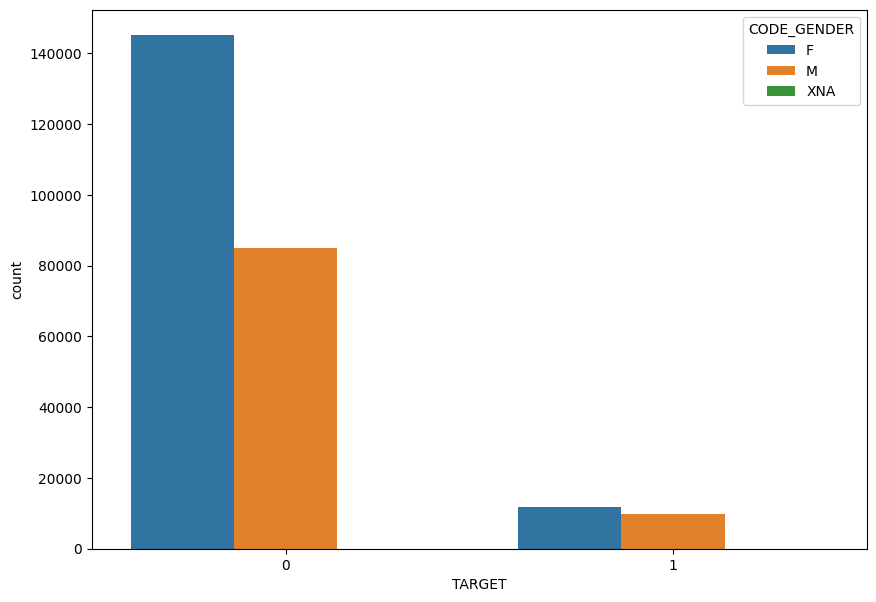

In [29]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df_selected)

Female have more difficulties with payments than man, this is general because we have more female applicants from the data.

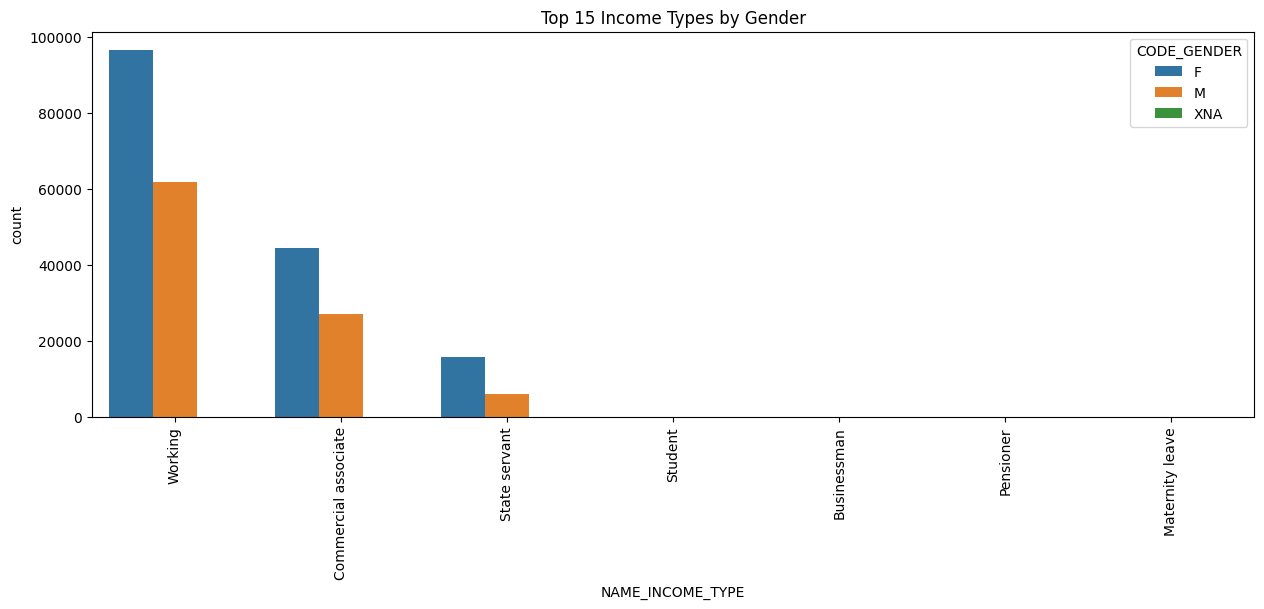

In [30]:
income_type = (df_selected.groupby(['NAME_INCOME_TYPE', 'CODE_GENDER']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(15))
plt.figure(figsize=(15, 5))
sns.barplot(data=income_type, x='NAME_INCOME_TYPE', y='count', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.title('Top 15 Income Types by Gender')
plt.show()

# Feature Engineering and Transformation

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in categorical.index:
    df_selected[column] = le.fit_transform(df_selected[column])

In [32]:
corr_train = df_selected.corr()['TARGET']
corr_train

,TARGET
TARGET,1.000000
NAME_CONTRACT_TYPE,-0.036275
CODE_GENDER,0.049323
FLAG_OWN_CAR,-0.031955
FLAG_OWN_REALTY,-0.002770
CNT_CHILDREN,0.007751
AMT_INCOME_TOTAL,-0.007318
AMT_CREDIT,-0.040712
AMT_ANNUITY,-0.020074
AMT_GOODS_PRICE,-0.050345


In [33]:
print(corr_train.sort_values().tail(10))
corr_train.sort_values().head(10)

CNT_CHILDREN                   0.007751
OCCUPATION_TYPE                0.008384
FLAG_WORK_PHONE                0.019633
NAME_HOUSING_TYPE              0.031856
NAME_INCOME_TYPE               0.034863
CODE_GENDER                    0.049323
REGION_RATING_CLIENT           0.065135
NAME_EDUCATION_TYPE            0.065921
REGION_RATING_CLIENT_W_CITY    0.067482
TARGET                         1.000000
Name: TARGET, dtype: float64


,TARGET
WORK_DURATION,-0.074790
AGE,-0.065942
AMT_GOODS_PRICE,-0.050345
AMT_CREDIT,-0.040712
REGION_POPULATION_RELATIVE,-0.040613
NAME_CONTRACT_TYPE,-0.036275
FLAG_OWN_CAR,-0.031955
FLAG_PHONE,-0.024018
AMT_ANNUITY,-0.020074
AMT_INCOME_TOTAL,-0.007318


In [34]:
corr_matrix = df_selected.corr().abs()
column_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.7) and column != column]
print(column_drop)

[]


In [35]:
# standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_selected[numeric] = scaler.fit_transform(df_selected[numeric])

# Modelling

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df_selected.drop('TARGET', axis=1)
y = df_selected['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((201495, 26), (50374, 26), (201495,), (50374,))

Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression(C=2, max_iter=1000, class_weight='balanced')

# Fit the model on the training data
logistic_regressor.fit(X_train, y_train)

# After fitting the model, you can check its performance
y_pred = logistic_regressor.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.4024


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
print("📊 Logistic Regression Performance Metrics:")
print("Accuracy       :", accuracy_score(y_test, y_pred))
print("Precision      :", precision_score(y_test, y_pred))
print("Recall         :", recall_score(y_test, y_pred))
print("F1-Score       :", f1_score(y_test, y_pred))
print("ROC-AUC Score  :", roc_auc_score(y_test, logistic_regressor.predict_proba(X_test)[:, 1]))

📊 Logistic Regression Performance Metrics:
Accuracy       : 0.5976495811331243
Precision      : 0.13093799386446034
Recall         : 0.6419781221513218
F1-Score       : 0.21751216122307157
ROC-AUC Score  : 0.6615163205511281


In [42]:
arr_feature_coef = abs(logistic_regressor.coef_[0])
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame({
    'Feature': arr_feature_names,
    'Importance': arr_feature_coef
})
df_all_features = df_feature_importance.sort_values(by='Importance', ascending=False)
df_all_features

,Feature,Importance
8,AMT_GOODS_PRICE,1.305990
6,AMT_CREDIT,1.101758
23,REGION_RATING_CLIENT_W_CITY,0.457392
1,CODE_GENDER,0.374571
0,NAME_CONTRACT_TYPE,0.370749
17,FLAG_CONT_MOBILE,0.324064
2,FLAG_OWN_CAR,0.314331
21,CNT_FAM_MEMBERS,0.293686
15,FLAG_EMP_PHONE,0.292417
14,FLAG_MOBIL,0.288214


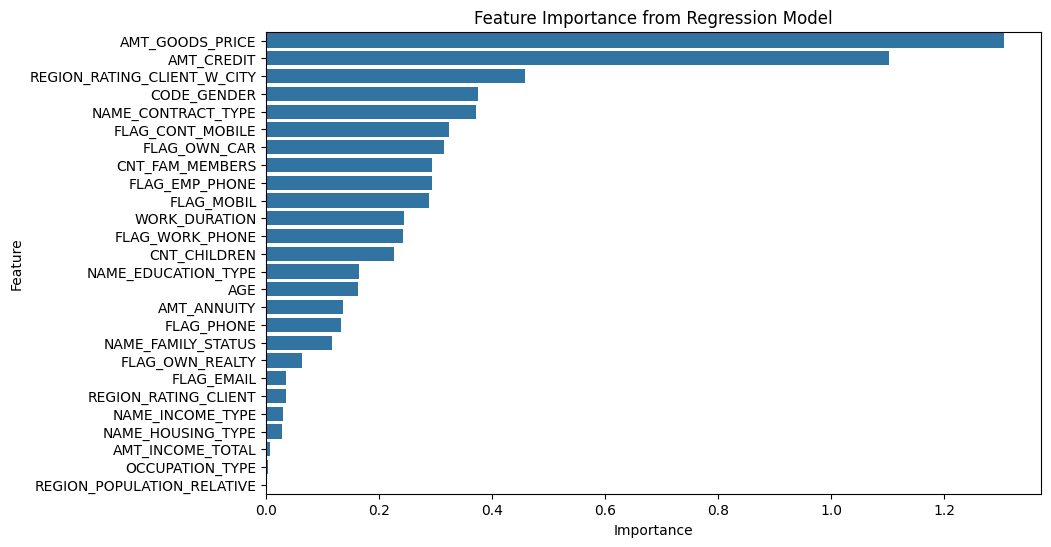

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_all_features)
plt.title('Feature Importance from Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)

In [45]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [46]:
random_forest_pred = random_forest.predict(X_test)

In [47]:
# Random Forest Evaluation
print("\n🌳 Random Forest Performance Metrics:")
print("Accuracy       :", accuracy_score(y_test, random_forest_pred))
print("Precision      :", precision_score(y_test, random_forest_pred))
print("Recall         :", recall_score(y_test, random_forest_pred))
print("F1-Score       :", f1_score(y_test, random_forest_pred))
print("ROC-AUC Score  :", roc_auc_score(y_test, random_forest_pred))


🌳 Random Forest Performance Metrics:
Accuracy       : 0.912772461984357
Precision      : 0.125
Recall         : 0.00022789425706472196
F1-Score       : 0.00045495905368516835
ROC-AUC Score  : 0.500037837008061


In [48]:
feature_importance = random_forest.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df


,Feature,Importance
7,AMT_ANNUITY,1.201412e-01
6,AMT_CREDIT,1.047694e-01
24,AGE,1.017916e-01
13,REGION_POPULATION_RELATIVE,9.665714e-02
5,AMT_INCOME_TOTAL,9.029948e-02
8,AMT_GOODS_PRICE,8.577674e-02
25,WORK_DURATION,8.028707e-02
20,OCCUPATION_TYPE,6.362215e-02
11,NAME_FAMILY_STATUS,2.967861e-02
21,CNT_FAM_MEMBERS,2.850925e-02


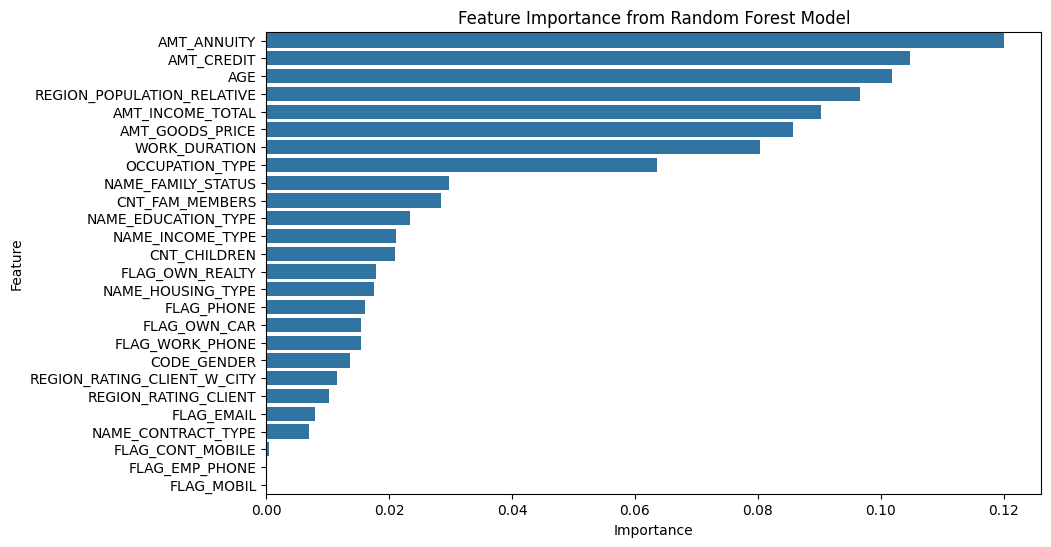

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Conclusion

*   Model regresi logistik memiliki kinerja yang lebih buruk secara keseluruhan dibandingkan Random Forest. Namun, recall yang lebih tinggi pada model ini menunjukkan bahwa model ini lebih baik dalam mengidentifikasi kasus positif, meskipun dengan tingkat akurasi yang rendah.
*   Meskipun memiliki akurasi yang tinggi, model Random Forest menunjukkan kinerja yang buruk dalam memprediksi kelas positif. Hal ini mengindikasikan bahwa model mungkin terlalu fokus pada kelas mayoritas dan kurang sensitif terhadap kelas minoritas.

